<a href="https://colab.research.google.com/github/Razor1889/Machine-Learning-on-Diverse-Datasets/blob/main/Term_Project_Second_Case_Categorial_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## A Comparative Evaluation of Machine Learning Techniques on Diverse Dataset Types

In [ ]:
#Read in Data.
import pandas as pd
import IPython
import timeit

df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/iris.csv')
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
#Split the table such that we have y = F(x).
#Isolate the result.
y = df['Species']
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Species, Length: 150, dtype: object

In [ ]:
#By dropping the Species column, we have isolated the rest of the table.
x = df.drop('Species', axis=1)
x

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3




### Cross Validation and Training

In [ ]:
%%timeit -n 100
from sklearn.model_selection import train_test_split
#individual efficiency for training etc are calculated separately
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)


# Split the training set into four equal-sized subsets to implement cross-validation
subset_size = len(x_train) // 4
x_train_sub1 = x_train[:subset_size]
x_train_sub2 = x_train[subset_size:2*subset_size]
x_train_sub3 = x_train[2*subset_size:3*subset_size]
x_train_sub4 = x_train[3*subset_size:]

y_train_sub1 = y_train[:subset_size]
y_train_sub2 = y_train[subset_size:2*subset_size]
y_train_sub3 = y_train[2*subset_size:3*subset_size]
y_train_sub4 = y_train[3*subset_size:]


1.01 ms ± 107 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
#Timit function runs the cell as a function so it restricts the scope, therefore, we re-do the training outside of timeit to
# maintain global scope
from sklearn.model_selection import train_test_split
#individual efficiency for training etc are calculated separately
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)


# Split the training set into four equal-sized subsets
subset_size = len(x_train) // 4
x_train_sub1 = x_train[:subset_size]
x_train_sub2 = x_train[subset_size:2*subset_size]
x_train_sub3 = x_train[2*subset_size:3*subset_size]
x_train_sub4 = x_train[3*subset_size:]

y_train_sub1 = y_train[:subset_size]
y_train_sub2 = y_train[subset_size:2*subset_size]
y_train_sub3 = y_train[2*subset_size:3*subset_size]
y_train_sub4 = y_train[3*subset_size:]


In [ ]:
#We then perform linear regression, however, since our y data has string values, we need to encode the values
#such that they have numerical assignments to each category of species.
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)
y_train_sub1 = label_encoder.fit_transform(y_train_sub1)
y_train_sub2 = label_encoder.fit_transform(y_train_sub2)
y_train_sub3 = label_encoder.fit_transform(y_train_sub3)
y_train_sub4 = label_encoder.fit_transform(y_train_sub4)

In [ ]:
from sklearn.linear_model import LinearRegression
#Create a linear regression model and provide the training data
lr = LinearRegression()
lr.fit(x_train_sub1, y_train_sub1)
lr.fit(x_train_sub2, y_train_sub2)
lr.fit(x_train_sub3, y_train_sub3)
lr.fit(x_train_sub4, y_train_sub4)

y_lr_train_pred_1 = lr.predict(x_train_sub1)
y_lr_train_pred_2 = lr.predict(x_train_sub2)
y_lr_train_pred_3 = lr.predict(x_train_sub3)
y_lr_train_pred_4 = lr.predict(x_train_sub4)
y_lr_test_pred = lr.predict(x_test)


In [ ]:
%%timeit -n 100
from sklearn.linear_model import LinearRegression
#Create a linear regression model and provide the training data
lr = LinearRegression()
lr.fit(x_train_sub1, y_train_sub1)
lr.fit(x_train_sub2, y_train_sub2)
lr.fit(x_train_sub3, y_train_sub3)
lr.fit(x_train_sub4, y_train_sub4)

y_lr_train_pred_1 = lr.predict(x_train_sub1)
y_lr_train_pred_2 = lr.predict(x_train_sub2)
y_lr_train_pred_3 = lr.predict(x_train_sub3)
y_lr_train_pred_4 = lr.predict(x_train_sub4)
y_lr_test_pred = lr.predict(x_test)


8.73 ms ± 520 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


So far, what we have done is implement F using linear regression. We then predicted y using F on the 2 data sets.

### Comparing Model Performance and Data Visualization

Subset 1 - Train set MSE: 0.03905101350224814 R2: 0.9441241460222205
Subset 2 - Train set MSE: 0.0791711416473191 R2: 0.8680480972544682
Subset 3 - Train set MSE: 0.04707888173645607 R2: 0.9326375301068196
Subset 4 - Train set MSE: 0.03746615391433474 R2: 0.9297509614106223
Test set MSE: 0.03788094184806934 Test set R2: 0.9523842909730972


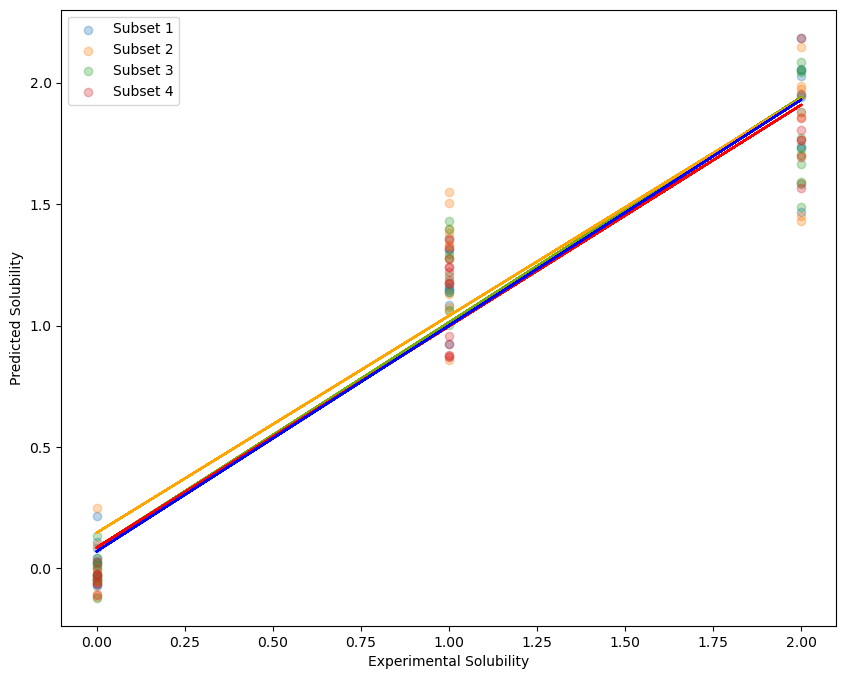

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Calculate scores for each subset
mse_train_1 = mean_squared_error(y_train_sub1, y_lr_train_pred_1)
r2_train_1 = r2_score(y_train_sub1, y_lr_train_pred_1)

mse_train_2 = mean_squared_error(y_train_sub2, y_lr_train_pred_2)
r2_train_2 = r2_score(y_train_sub2, y_lr_train_pred_2)

mse_train_3 = mean_squared_error(y_train_sub3, y_lr_train_pred_3)
r2_train_3 = r2_score(y_train_sub3, y_lr_train_pred_3)

mse_train_4 = mean_squared_error(y_train_sub4, y_lr_train_pred_4)
r2_train_4 = r2_score(y_train_sub4, y_lr_train_pred_4)

mse_test = mean_squared_error(y_test, y_lr_test_pred)
r2_test = r2_score(y_test, y_lr_test_pred)


print('Subset 1 - Train set MSE:', mse_train_1, 'R2:', r2_train_1)
print('Subset 2 - Train set MSE:', mse_train_2, 'R2:', r2_train_2)
print('Subset 3 - Train set MSE:', mse_train_3, 'R2:', r2_train_3)
print('Subset 4 - Train set MSE:', mse_train_4, 'R2:', r2_train_4)
print('Test set MSE:', mse_test, 'Test set R2:', r2_test)

# Plotting
plt.figure(figsize=(10, 8))


plt.scatter(x=y_train_sub1, y=y_lr_train_pred_1, alpha=0.3, label='Subset 1')
z_1 = np.polyfit(y_train_sub1, y_lr_train_pred_1, 1)
p_1 = np.poly1d(z_1)
plt.plot(y_train_sub1, p_1(y_train_sub1), '#7CAE00')


plt.scatter(x=y_train_sub2, y=y_lr_train_pred_2, alpha=0.3, label='Subset 2')
z_2 = np.polyfit(y_train_sub2, y_lr_train_pred_2, 1)
p_2 = np.poly1d(z_2)
plt.plot(y_train_sub2, p_2(y_train_sub2), '#FFA500')


plt.scatter(x=y_train_sub3, y=y_lr_train_pred_3, alpha=0.3, label='Subset 3')
z_3 = np.polyfit(y_train_sub3, y_lr_train_pred_3, 1)
p_3 = np.poly1d(z_3)
plt.plot(y_train_sub3, p_3(y_train_sub3), '#FF0000')


plt.scatter(x=y_train_sub4, y=y_lr_train_pred_4, alpha=0.3, label='Subset 4')
z_4 = np.polyfit(y_train_sub4, y_lr_train_pred_4, 1)
p_4 = np.poly1d(z_4)
plt.plot(y_train_sub4, p_4(y_train_sub4), '#0000FF')

plt.ylabel('Predicted Solubility')
plt.xlabel('Experimental Solubility')
plt.legend()
plt.show()
